In [1]:
# Read in classification_results_all_models.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Read in the data
df = pd.read_csv('classification_results_all_models.csv')

In [2]:
df.head()

,Document,file_names,Human,Llama,Phi3,Gemma2,GPT,RoBERTa,VADER,BeigeSage
0,3,1970_ch (1)_chunk_4.txt,negative,negative,negative,negative,negative,negative,negative,negative
1,6,1970_cl (6)_chunk_1.txt,positive,mixed,mixed,mixed,mixed,mixed,mixed,mixed
2,13,1970_ny (1)_chunk_3.txt,mixed,mixed,mixed,mixed,negative,negative,mixed,negative
3,21,1971_kc (12)_chunk_2.txt,mixed,mixed,mixed,mixed,mixed,mixed,positive,mixed
4,35,1972_at (9)_chunk_2.txt,positive,mixed,mixed,mixed,mixed,positive,positive,positive


In [3]:
# List of model columns to compare with Human column
models = ['Llama', 'Phi3', 'Gemma2', 'GPT', 'RoBERTa', 'VADER', 'BeigeSage']

# Create new columns with 1 if model matches human, 0 if not
for model in models:
    df[f'{model}_match'] = (df['Human'] == df[model]).astype(int)

In [4]:
# Calculate the accuracy of each model on each classification

# Calculate the overall proportion of time each model is correct
overall_proportion = df[[f'{model}_match' for model in models]].mean()

# Calculate the proportion of time each model is correct for each class
class_proportion = df.groupby('Human')[[f'{model}_match' for model in models]].mean()

# Calculate the count of each class predicted by each model
class_counts = pd.DataFrame()

for model in models:
    class_counts[model] = df[model].value_counts()

class_counts = class_counts.fillna(0).astype(int)

# Combine the overall and class-specific proportions into a single DataFrame
result_df = pd.concat([overall_proportion.rename('Overall'), class_proportion])
result_df = result_df.T

# Add class counts to the result DataFrame
for model in models:
    result_df[f'{model}_positive_count'] = class_counts.loc['positive', model] if 'positive' in class_counts.index else 0
    result_df[f'{model}_negative_count'] = class_counts.loc['negative', model] if 'negative' in class_counts.index else 0
    result_df[f'{model}_mixed_count'] = class_counts.loc['mixed', model] if 'mixed' in class_counts.index else 0

# Display the final result DataFrame
result_df

,Llama_match,Phi3_match,Gemma2_match,GPT_match,RoBERTa_match,VADER_match,BeigeSage_match,mixed,negative,positive,...,GPT_mixed_count,RoBERTa_positive_count,RoBERTa_negative_count,RoBERTa_mixed_count,VADER_positive_count,VADER_negative_count,VADER_mixed_count,BeigeSage_positive_count,BeigeSage_negative_count,BeigeSage_mixed_count
0,0.675,0.62,0.59,0.63,0.69,0.495,0.715,NaN,NaN,NaN,...,147,67,49,84,152,33,15,83,36,81
Llama_match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903614,0.589744,0.474359,...,147,67,49,84,152,33,15,83,36,81
Phi3_match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.927711,0.487179,0.358974,...,147,67,49,84,152,33,15,83,36,81
Gemma2_match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.951807,0.410256,0.294872,...,147,67,49,84,152,33,15,83,36,81
GPT_match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.939759,0.615385,0.307692,...,147,67,49,84,152,33,15,83,36,81
RoBERTa_match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650602,0.794872,0.679487,...,147,67,49,84,152,33,15,83,36,81
VADER_match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096386,0.435897,0.948718,...,147,67,49,84,152,33,15,83,36,81
BeigeSage_match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650602,0.641026,0.820513,...,147,67,49,84,152,33,15,83,36,81


In [5]:
# Invert the result DataFrame for plotting
result_df_transposed = result_df.T
result_df_transposed

,0,Llama_match,Phi3_match,Gemma2_match,GPT_match,RoBERTa_match,VADER_match,BeigeSage_match
Llama_match,0.675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phi3_match,0.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gemma2_match,0.590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPT_match,0.630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoBERTa_match,0.690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VADER_match,0.495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BeigeSage_match,0.715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mixed,NaN,0.903614,0.927711,0.951807,0.939759,0.650602,0.096386,0.650602
negative,NaN,0.589744,0.487179,0.410256,0.615385,0.794872,0.435897,0.641026
positive,NaN,0.474359,0.358974,0.294872,0.307692,0.679487,0.948718,0.820513


Confusion Matrix for BeigeSage:
[[64  0 14]
 [ 1 25 13]
 [18 11 54]]

Confusion Matrix for Llama:
[[37  0 41]
 [ 1 23 15]
 [ 4  4 75]]

Confusion Matrix for Phi3:
[[28  0 50]
 [ 0 19 20]
 [ 2  4 77]]

Confusion Matrix for Gemma2:
[[23  0 55]
 [ 0 16 23]
 [ 1  3 79]]

Confusion Matrix for GPT:
[[24  0 54]
 [ 0 24 15]
 [ 1  4 78]]

Confusion Matrix for VADER:
[[74  1  3]
 [18 17  4]
 [60 15  8]]



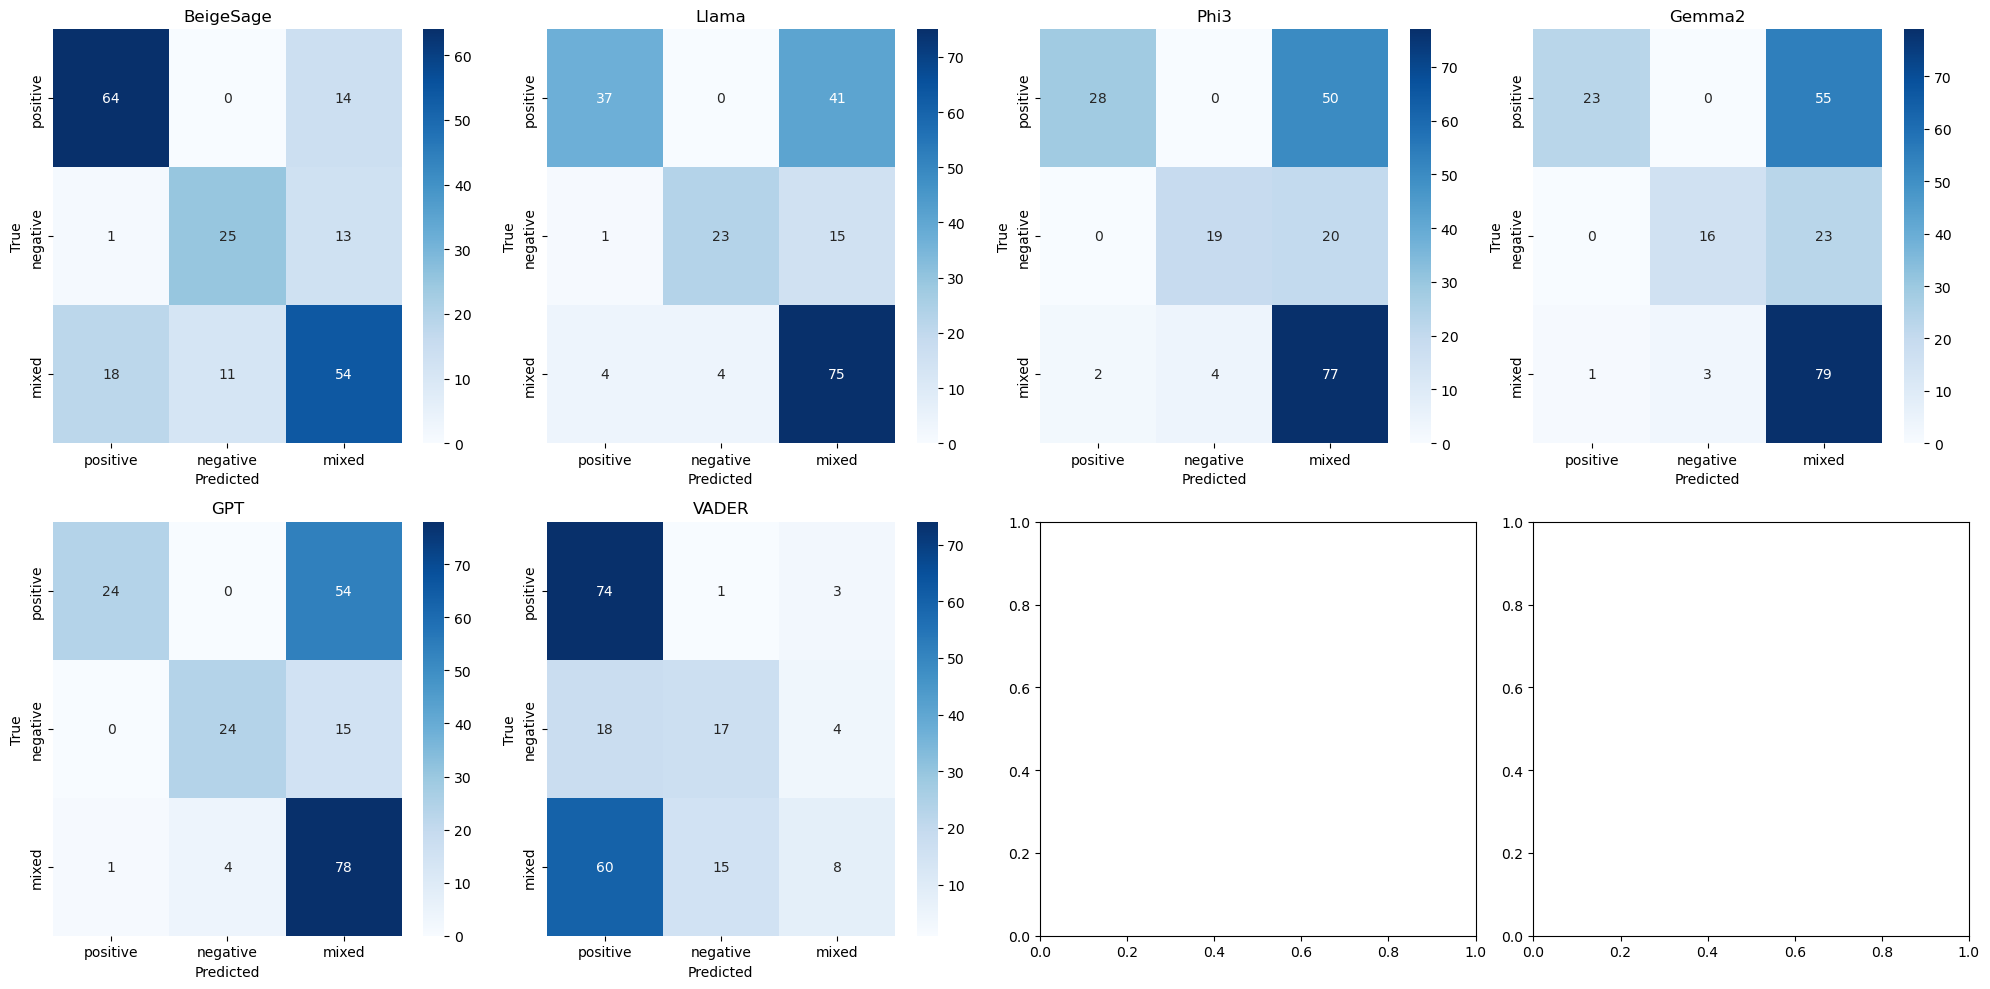

In [19]:
from sklearn.metrics import confusion_matrix


# List of model columns to compare with Human column
models = ['BeigeSage', 'Llama', 'Phi3', 'Gemma2', 'GPT', 'VADER']

# Create an empty dictionary to store confusion matrices
confusion_matrices = {}

# Calculate confusion matrix for each model
for model in models:
    # Get the human labels and model predictions
    human_labels = df['Human']
    model_predictions = df[model]
    
    # Calculate confusion matrix
    cm = confusion_matrix(human_labels, model_predictions, labels=['positive', 'negative', 'mixed'])
    
    # Store the confusion matrix in the dictionary
    confusion_matrices[model] = cm

# Display the confusion matrices
for model, cm in confusion_matrices.items():
    print(f"Confusion Matrix for {model}:\n{cm}\n")


# Plot the confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (model, cm) in enumerate(confusion_matrices.items()):
    ax = axes[i // 4, i % 4]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(model)
    ax.set_xticklabels(['positive', 'negative', 'mixed'])
    ax.set_yticklabels(['positive', 'negative', 'mixed'])

plt.tight_layout()

In [11]:
# Calculate macro F1 score
from sklearn.metrics import f1_score

# Create an empty dictionary to store F1 scores
f1_scores = {}

# Calculate F1 score for each model
for model in models:
    # Get the human labels and model predictions
    human_labels = df['Human']
    model_predictions = df[model]

    # Calculate macro F1 score
    f1 = f1_score(human_labels, model_predictions, average='macro')

    # Store the F1 score in the dictionary
    f1_scores[model] = f1

# Display the F1 scores
f1_scores

{'Llama': 0.6715236476918721,
 'Phi3': 0.6003289872387582,
 'Gemma2': 0.5536792878070769,
 'GPT': 0.6202327324962356,
 'RoBERTa': 0.6940955080434742,
 'VADER': 0.42632192973807886,
 'BeigeSage': 0.7067447693110472}

In [14]:
# Calculate Matthews Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

# Create an empty dictionary to store MCC values
mcc_values = {}

# Calculate MCC for each model
for model in models:
    # Get the human labels and model predictions
    human_labels = df['Human']
    model_predictions = df[model]

    # Calculate MCC
    mcc = matthews_corrcoef(human_labels, model_predictions)

    # Store the MCC value in the dictionary
    mcc_values[model] = mcc

# Display the MCC values
mcc_values

{'Llama': 0.5179021263179324,
 'Phi3': 0.4500999137108965,
 'Gemma2': 0.4149362120115202,
 'GPT': 0.47842394866270366,
 'RoBERTa': 0.5233422053867085,
 'VADER': 0.2714719798387004,
 'BeigeSage': 0.5515828415050644}

In [15]:
# Calculate Cohen's Kappa

# Note: Vanacore et al. (2022) warn not to use Cohen on imbalanced data

from sklearn.metrics import cohen_kappa_score

# Create an empty dictionary to store Kappa values
kappa_values = {}

# Calculate Kappa for each model
for model in models:
    # Get the human labels and model predictions
    human_labels = df['Human']
    model_predictions = df[model]

    # Calculate Kappa
    kappa = cohen_kappa_score(human_labels, model_predictions)

    # Store the Kappa value in the dictionary
    kappa_values[model] = kappa

# Display the Kappa values
kappa_values

{'Llama': 0.47576417453020414,
 'Phi3': 0.38115788616562163,
 'Gemma2': 0.3266546230908194,
 'GPT': 0.4021892797996527,
 'RoBERTa': 0.5210690973697423,
 'VADER': 0.21130719975011714,
 'BeigeSage': 0.5511634316311665}